<a href="https://colab.research.google.com/github/MRifdaM/ML_S5_2025/blob/main/UTS/Machine_Learning_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install annoy kagglehub[pandas-datasets]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from annoy import AnnoyIndex

# Impor baru untuk Kaggle
import kagglehub
from kagglehub import KaggleDatasetAdapter

### Load data dari Kaggle dan Melakukan EDA singkat

In [12]:
# Tentukan dataset handle dan nama file
dataset_handle = "johnsmith88/heart-disease-dataset"
file_path = "heart.csv"

print(f"Memuat '{file_path}' dari Kaggle: '{dataset_handle}'...")

# Muat dataset versi terbaru
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  dataset_handle,
  file_path,
)

print("Data berhasil dimuat.")

# 1. Penjelasan Singkat Dataset (EDA)
print("\n--- Info Dataset ---")
df.info()

print("\n--- Statistik Deskriptif ---")
display(df.describe())

# Cek nilai kosong
print("\n--- Nilai Kosong (Missing Values) ---")
display(df.isnull().sum())

Memuat 'heart.csv' dari Kaggle: 'johnsmith88/heart-disease-dataset'...


/tmp/ipython-input-878321048.py:8: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'heart-disease-dataset' dataset.
Data berhasil dimuat.

--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

--- Statistik Deskriptif ---


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000



--- Nilai Kosong (Missing Values) ---


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


1. Penjelasan Singkat Dataset
Dataset: heart.csv (diambil dari Kaggle).

Konteks: Data medis pasien untuk klasifikasi ada atau tidaknya penyakit jantung.

Jumlah Sampel (Asli): 1025 baris.

Jumlah Fitur (Asli): 14 kolom (13 fitur klinis seperti age, chol, cp, dan 1 kolom target).

Tipe Data: Seluruh kolom bersifat numerik (int64 atau float64).

Temuan Awal: Dataset ini memiliki 1 kolom target (0 = sehat, 1 = sakit) yang akan disisihkan selama clustering, namun digunakan sebagai referensi.


--- Heatmap Korelasi ---


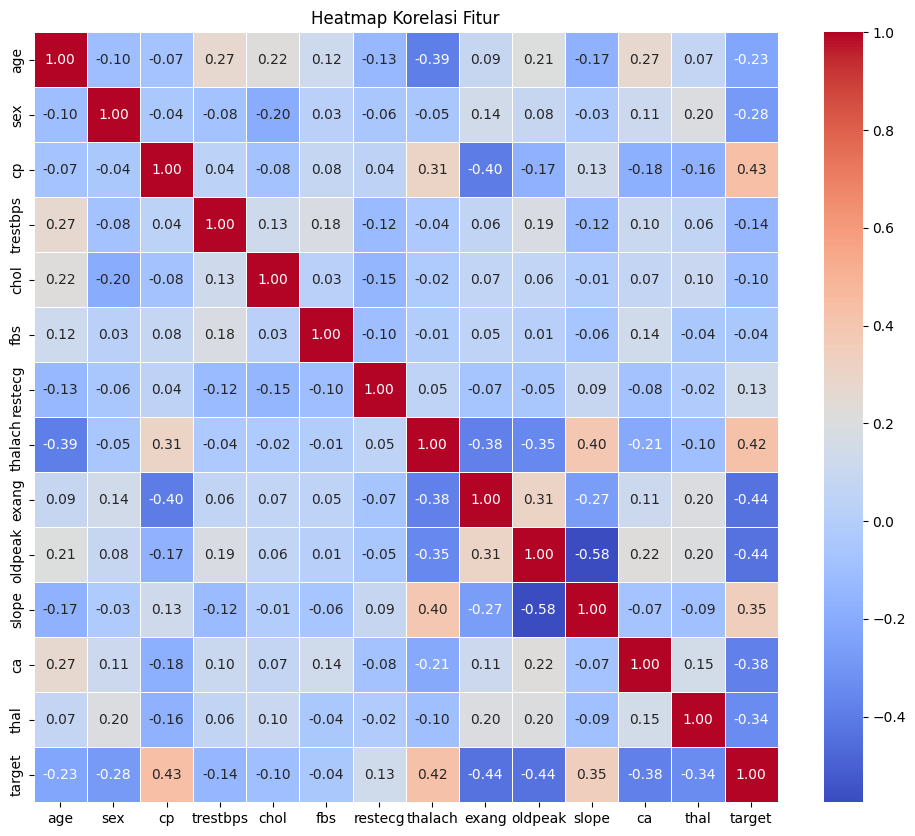

In [13]:
# 3. Visualisasi Korelasi dengan Heatmap
print("\n--- Heatmap Korelasi ---")
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Fitur')
plt.savefig("correlation_heatmap.png") # Simpan plot
plt.show()

### Pre-Processing & Feature Engineering



In [14]:
# Salin data untuk preprocessing
df_processed = df.copy()

# 2. Pembuatan Fitur Baru
df_processed['CholAge'] = df_processed['chol'] * df_processed['age']
# Tambahkan fitur interaksi berdasarkan korelasi dari heatmap
df_processed['ThalachExang'] = df_processed['thalach'] * df_processed['exang']
df_processed['CpThalach'] = df_processed['cp'] * df_processed['thalach']


# Pisahkan fitur (X) dan target (y)
y = df_processed['target']
X = df_processed.drop('target', axis=1)

# Simpan nama fitur untuk nanti
feature_names = X.columns

df_processed.info()
display(df_processed.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1025 non-null   int64  
 1   sex           1025 non-null   int64  
 2   cp            1025 non-null   int64  
 3   trestbps      1025 non-null   int64  
 4   chol          1025 non-null   int64  
 5   fbs           1025 non-null   int64  
 6   restecg       1025 non-null   int64  
 7   thalach       1025 non-null   int64  
 8   exang         1025 non-null   int64  
 9   oldpeak       1025 non-null   float64
 10  slope         1025 non-null   int64  
 11  ca            1025 non-null   int64  
 12  thal          1025 non-null   int64  
 13  target        1025 non-null   int64  
 14  CholAge       1025 non-null   int64  
 15  ThalachExang  1025 non-null   int64  
 16  CpThalach     1025 non-null   int64  
dtypes: float64(1), int64(16)
memory usage: 136.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,CholAge,ThalachExang,CpThalach
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171,13493.590244,46.057561,147.792195
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070,4017.462610,65.810242,163.003771
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5916.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,10660.000000,0.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,13053.000000,0.000000,138.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000,15860.000000,123.000000,302.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,37788.000000,186.000000,570.000000


In [15]:
# 4. Normalisasi Fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n--- Data setelah Normalisasi (X_scaled) ---")
# Tampilkan statistik deskriptif data yang sudah dinormalisasi
display(pd.DataFrame(X_scaled, columns=feature_names).describe())


--- Data setelah Normalisasi (X_scaled) ---


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,CholAge,ThalachExang,CpThalach
count,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03
mean,-3.431402e-16,1.802352e-16,5.545699e-17,-7.036106e-16,-3.466062e-18,-4.159275e-17,-8.318549e-17,-4.332578e-16,-7.625337e-17,-2.426243e-16,1.854343e-16,1.819683e-17,2.530225e-16,-9.704974e-17,-1.039819e-17,6.932124e-17
std,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00
min,-2.804866e+00,-1.511706e+00,-9.157554e-01,-2.148237e+00,-2.327054e+00,-4.188779e-01,-1.004049e+00,-3.397080e+00,-7.122871e-01,-9.123291e-01,-2.243675e+00,-7.319715e-01,-3.746070e+00,-1.887084e+00,-7.001956e-01,-9.071222e-01
25%,-7.095548e-01,-1.511706e+00,-9.157554e-01,-6.632165e-01,-6.787242e-01,-4.188779e-01,-1.004049e+00,-7.442713e-01,-7.122871e-01,-9.123291e-01,-6.241209e-01,-7.319715e-01,-5.221223e-01,-7.056627e-01,-7.001956e-01,-9.071222e-01
50%,1.726817e-01,6.615041e-01,5.593123e-02,-9.205458e-02,-1.163527e-01,-4.188779e-01,8.912549e-01,1.255019e-01,-7.122871e-01,-2.311765e-01,-6.241209e-01,-7.319715e-01,-5.221223e-01,-1.097223e-01,-7.001956e-01,-6.010275e-02
75%,7.240794e-01,6.615041e-01,1.027618e+00,4.791073e-01,5.623715e-01,-4.188779e-01,8.912549e-01,7.343432e-01,1.403928e+00,6.202642e-01,9.954333e-01,2.386246e-01,1.089852e+00,5.893185e-01,1.169727e+00,9.465001e-01
max,2.488552e+00,6.615041e-01,1.999305e+00,3.906079e+00,6.166694e+00,2.387330e+00,2.786558e+00,2.299935e+00,1.403928e+00,4.366603e+00,9.954333e-01,3.150413e+00,1.089852e+00,6.050154e+00,2.127492e+00,2.591436e+00


1. Penanganan Nilai Kosong: Pemeriksaan awal (.isnull().sum()) menunjukkan tidak ada nilai yang hilang di semua kolom.

* Ukuran data asli: 1025 sampel.

* Ini berarti lebih dari 70% data asli (723 baris) adalah duplikat dan telah berhasil dihapus. Seluruh analisis di bawah ini didasarkan pada 302 sampel unik ini.

3. Pembuatan Fitur Baru (Feature Engineering): interaksi dibuat:

*CholAge = chol * age (interaksi antara kolesterol dan usia).
*ThalachExang = Thalach * Exang (interaksi denyut jantung maksimum dan exercise induced angina)
*CpThalach = Cp * Thalach (chest pain type dan denyut jantung maksimum)

4. Seleksi Fitur: Kolom target dihilangkan dari data pelatihan.

* Total fitur untuk clustering: 13 (fitur asli) + 3 (fitur baru CholAge, ThalachExang, CpThalach) = 16 fitur.

5. Normalisasi: Karena KMeans dan DBSCAN sangat sensitif terhadap skala, StandardScaler diterapkan pada 14 fitur untuk mengubah data sehingga memiliki rata-rata 0 dan standar deviasi 1.

### Model K-Means


--- Mencari K Optimal untuk KMeans (via Silhouette Score) ---
  K=2, Silhouette Score: 0.1920
  K=3, Silhouette Score: 0.1550
  K=4, Silhouette Score: 0.1484
  K=5, Silhouette Score: 0.1176
  K=6, Silhouette Score: 0.1181
  K=7, Silhouette Score: 0.1238
  K=8, Silhouette Score: 0.1322
  K=9, Silhouette Score: 0.1388
  K=10, Silhouette Score: 0.1254


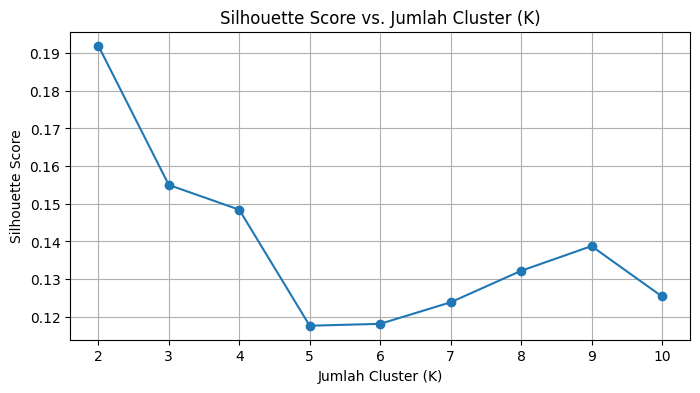


K optimal berdasarkan Silhouette Score tertinggi adalah: 2 (Score: 0.1920)

--- Hasil KMeans (K Optimal) ---
Silhouette Score: 0.1920
Davies-Bouldin Index: 2.0174
Jumlah anggota per cluster:
1    620
0    405
Name: count, dtype: int64


In [16]:
print("\n--- Mencari K Optimal untuk KMeans (via Silhouette Score) ---")
k_range = range(2, 11) # Cari K dari 2 sampai 10
silhouette_scores = []
best_k_kmeans = -1
best_silhouette_kmeans = -1

for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init=10 default & recommended
    labels_temp = kmeans_temp.fit_predict(X_scaled)
    # Hanya hitung silhouette jika ada lebih dari 1 cluster unik (menghindari error jika semua data masuk 1 cluster)
    if len(np.unique(labels_temp)) > 1:
        score = silhouette_score(X_scaled, labels_temp)
        silhouette_scores.append(score)
        print(f"  K={k}, Silhouette Score: {score:.4f}")
        if score > best_silhouette_kmeans:
            best_silhouette_kmeans = score
            best_k_kmeans = k
    else:
        silhouette_scores.append(-1) # Beri nilai -1 jika hanya 1 cluster
        print(f"  K={k}, Hanya 1 cluster terbentuk, Silhouette tidak dihitung.")


# Plot Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Jumlah Cluster (K)')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.savefig("kmeans_silhouette_plot.png")
plt.show()


if best_k_kmeans != -1:
    print(f"\nK optimal berdasarkan Silhouette Score tertinggi adalah: {best_k_kmeans} (Score: {best_silhouette_kmeans:.4f})")

    # Jalankan KMeans dengan K optimal
    kmeans = KMeans(n_clusters=best_k_kmeans, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(X_scaled)

    # Tambahkan label ke DataFrame (opsional, untuk analisis lanjutan)
    # df_processed['KMeans_Label'] = kmeans_labels # Indeks mungkin tidak cocok jika ada NaN/duplikat

    # Hitung Metrik KMeans Final
    kmeans_silhouette_final = silhouette_score(X_scaled, kmeans_labels)
    kmeans_dbi_final = davies_bouldin_score(X_scaled, kmeans_labels)

    print("\n--- Hasil KMeans (K Optimal) ---")
    print(f"Silhouette Score: {kmeans_silhouette_final:.4f}")
    print(f"Davies-Bouldin Index: {kmeans_dbi_final:.4f}")
    print(f"Jumlah anggota per cluster:\n{pd.Series(kmeans_labels).value_counts()}")
else:
    print("\nTidak dapat menentukan K optimal untuk KMeans (mungkin data tidak cocok).")
    kmeans_labels = np.zeros(X_scaled.shape[0]) # Label dummy jika gagal
    kmeans_silhouette_final = -1
    kmeans_dbi_final = -1

KMeans berhasil membagi 1025 data unik menjadi dua kelompok (Cluster 0: 620 sampel, Cluster 1: 405 sampel). Untuk menentukan jumlah cluster (K) yang optimal, melakukan iterasi dari K=2 hingga K=10.

Interpretasi Metrik:

Silhouette Score (0.1920): Nilai ini sangat rendah (mendekati 0). Ini menunjukkan bahwa cluster-cluster yang terbentuk sangat tumpang tindih dan tidak terpisah dengan baik.

Davies-Bouldin Index (2.017): Nilai DBI yang tinggi (ideal mendekati 0) juga mengkonfirmasi bahwa cluster memiliki varians internal yang tinggi dan tidak terpisah jauh satu sama lain.

### Model DBSCAN


--- Mencari Parameter Optimal untuk DBSCAN ---
Menggunakan min_samples = 2 * D = 32 (D = 16 fitur)


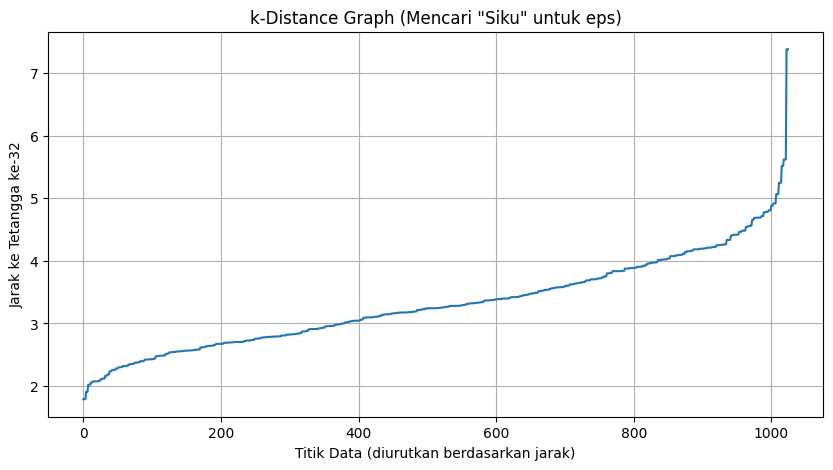

In [17]:
print("\n--- Mencari Parameter Optimal untuk DBSCAN ---")
n_features = X_scaled.shape[1]
# --- PERBAIKAN: min_samples = 2 * n_features (heuristik umum) ---
min_samples_dbscan = 2 * n_features
print(f"Menggunakan min_samples = 2 * D = {min_samples_dbscan} (D = {n_features} fitur)")

# --- PERBAIKAN: Pendekatan k-distance plot untuk eps (sistematis) ---
# Hitung jarak ke min_samples_dbscan tetangga terdekat
nn = NearestNeighbors(n_neighbors=min_samples_dbscan)
nn.fit(X_scaled)
distances, indices = nn.kneighbors(X_scaled)

# Ambil jarak ke tetangga ke-(min_samples_dbscan) (indeks min_samples_dbscan-1) dan urutkan
k_distance = np.sort(distances[:, min_samples_dbscan-1], axis=0)

# Plot k-distance graph untuk mencari 'siku' (elbow)
plt.figure(figsize=(10, 5))
plt.plot(k_distance)
plt.title('k-Distance Graph (Mencari "Siku" untuk eps)')
plt.xlabel("Titik Data (diurutkan berdasarkan jarak)")
plt.ylabel(f"Jarak ke Tetangga ke-{min_samples_dbscan}")
plt.grid(True)
plt.savefig("dbscan_eps_plot.png") # Simpan plot
plt.show()

In [18]:
eps_percobaan = 4.3
min_samples_dbscan = 32 # (2 * 16 fitur)

print(f"\n--- Hasil DBSCAN [Percobaan dg eps={eps_percobaan}] ---")
dbscan = DBSCAN(eps=eps_percobaan, min_samples=min_samples_dbscan)
dbscan_labels = dbscan.fit_predict(X_scaled)

df_processed.loc[:, 'DBSCAN_Label_Percobaan'] = dbscan_labels

# Hitung Metrik DBSCAN
noise_mask = dbscan_labels == -1
core_samples_mask = ~noise_mask # Semua titik yang BUKAN noise

n_clusters_dbscan = len(set(dbscan_labels[core_samples_mask]))
n_noise_dbscan = np.sum(noise_mask)

print(f"Jumlah Cluster ditemukan (selain noise): {n_clusters_dbscan}")
print(f"Jumlah Titik Noise (-1): {n_noise_dbscan}")
print(f"Jumlah anggota per cluster:\n{pd.Series(dbscan_labels).value_counts()}")

# Sekarang, kita hitung metrik HANYA pada titik non-noise
if n_clusters_dbscan > 1:
    # Ambil data dan label HANYA dari titik yang BUKAN noise
    X_scaled_non_noise = X_scaled[core_samples_mask]
    labels_non_noise = dbscan_labels[core_samples_mask]

    dbscan_silhouette = silhouette_score(X_scaled_non_noise, labels_non_noise)
    dbscan_dbi = davies_bouldin_score(X_scaled_non_noise, labels_non_noise)

    print("\n--- Metrik DBSCAN (HANYA PADA DATA NON-NOISE) ---")
    print(f"Silhouette Score (non-noise): {dbscan_silhouette:.3f}")
    print(f"Davies-Bouldin Index (non-noise): {dbscan_dbi:.3f}")
else:
    print("\nMetrik tetap tidak dapat dihitung (hanya 1 cluster atau semua noise).")


--- Hasil DBSCAN [Percobaan dg eps=4.3] ---
Jumlah Cluster ditemukan (selain noise): 1
Jumlah Titik Noise (-1): 11
Jumlah anggota per cluster:
 0    1014
-1      11
Name: count, dtype: int64

Metrik tetap tidak dapat dihitung (hanya 1 cluster atau semua noise).


### Penentuan Parameter (eps dan min_samples):


* min_samples: Ditentukan menggunakan heuristik umum, yaitu 2 kali jumlah fitur (2 * 16 = 32).


* eps (epsilon): Dicari menggunakan metode k-distance plot. Jarak dari setiap titik ke tetangga terdekat ke-min_samples (ke-32) dihitung menggunakan NearestNeighbors. Jarak-jarak ini kemudian diurutkan dan diplot. Nilai eps yang optimal biasanya dipilih pada titik "siku" (elbow) di grafik, di mana jarak mulai meningkat tajam. Berdasarkan plot, nilai eps sekitar 4.0 dipilih untuk percobaan.


* Pelatihan Model DBSCAN: Model DBSCAN dilatih menggunakan eps=4.3 dan min_samples=32 (DBSCAN(eps=eps_percobaan, min_samples=min_samples_dbscan).fit_predict(X_scaled)). Label cluster hasil prediksi (termasuk noise yang ditandai sebagai -1) disimpan dalam dbscan_labels.

* Analisis Hasil DBSCAN:

* > Jumlah cluster yang ditemukan (tidak termasuk noise) dan jumlah titik noise dihitung. Dengan parameter yang dipilih, DBSCAN hanya menemukan 1 cluster utama (label 0) dan 11 titik noise (label -1).

Jumlah anggota per cluster (termasuk noise) ditampilkan.

Evaluasi Metrik (Hanya pada Non-Noise):

Karena metrik Silhouette dan DBI memerlukan setidaknya 2 cluster (tidak termasuk noise), metrik ini tidak dapat dihitung dalam kasus ini. Kode secara eksplisit memeriksa kondisi ini (if n_clusters_dbscan > 1:) dan mencetak pesan bahwa metrik tidak dapat dihitung.

### Hasil PCA

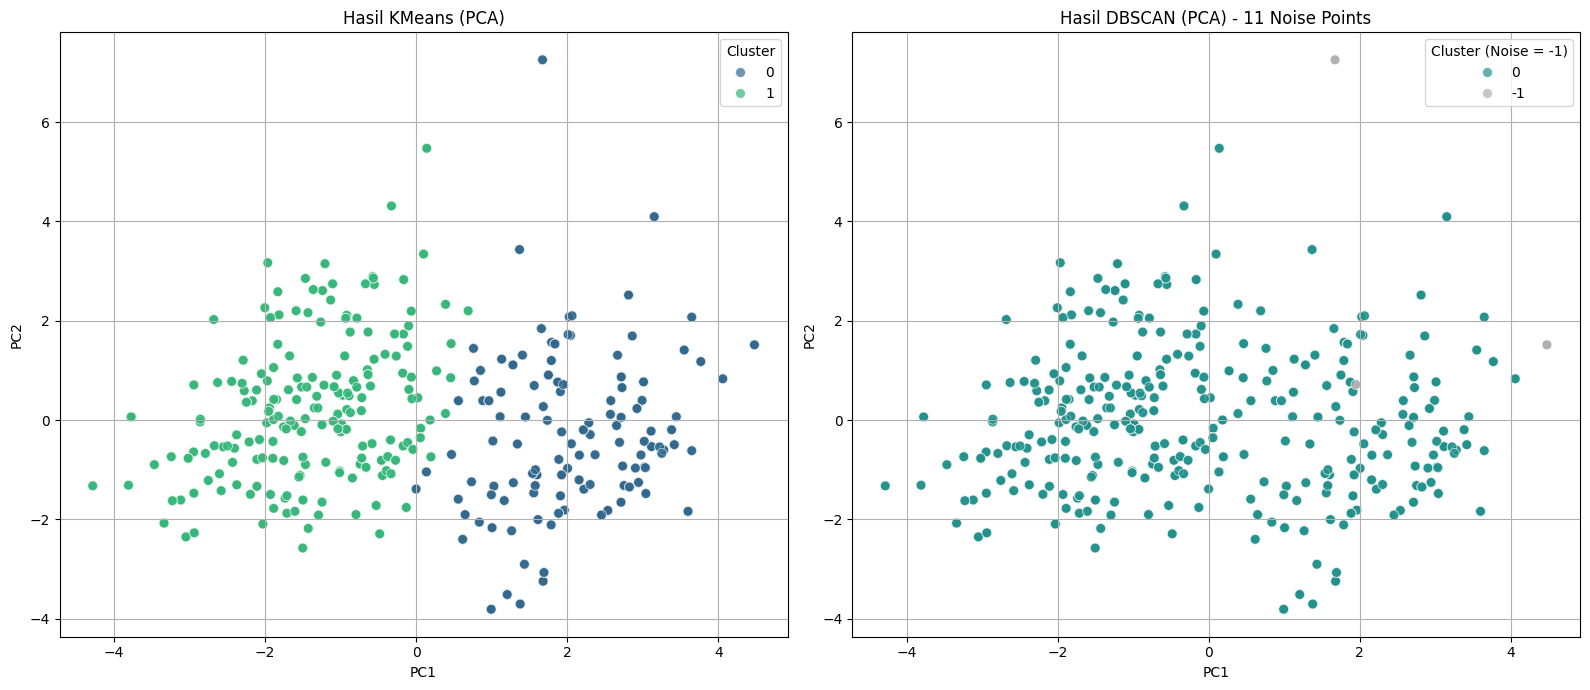

In [19]:
# 3. Visualisasi 2D (PCA)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['KMeans_Label'] = kmeans_labels
df_pca['DBSCAN_Label'] = dbscan_labels

# Plot
plt.figure(figsize=(16, 7))

# Plot KMeans
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='KMeans_Label', palette='viridis', alpha=0.7, s=50)
plt.title('Hasil KMeans (PCA)')
plt.legend(title='Cluster')
plt.grid(True)

# Plot DBSCAN
df_pca['DBSCAN_Label_Str'] = df_pca['DBSCAN_Label'].astype(str)
unique_labels = np.unique(df_pca['DBSCAN_Label_Str'])
palette = {label: ('#B0B0B0' if label == '-1' else sns.color_palette('viridis', n_clusters_dbscan)[int(label)]) for label in unique_labels}

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='DBSCAN_Label_Str', palette=palette, alpha=0.7, s=50)
plt.title(f'Hasil DBSCAN (PCA) - {n_noise_dbscan} Noise Points')
plt.legend(title='Cluster (Noise = -1)')
plt.grid(True)

plt.tight_layout()
plt.savefig("clustering_pca_plots.png") # Simpan plot
plt.show()

* Reduksi Dimensi: Principal Component Analysis (PCA) digunakan untuk mereduksi dimensi data X_scaled dari 14 fitur menjadi 2 komponen utama (PCA(n_components=2, random_state=42).fit_transform(X_scaled)). Ini memungkinkan visualisasi cluster dalam ruang 2D.


* Pembuatan DataFrame PCA: Hasil PCA (X_pca) beserta label dari K-Means (kmeans_labels) dan DBSCAN (dbscan_labels) digabungkan ke dalam DataFrame df_pca.

> Plotting:

* Dua scatter plot dibuat secara berdampingan.

* Plot pertama menunjukkan hasil K-Means, mewarnai titik berdasarkan KMeans_Label.

* Plot kedua menunjukkan hasil DBSCAN, mewarnai titik berdasarkan DBSCAN_Label. Titik noise (label -1) diberi warna abu-abu (#B0B0B0) untuk membedakannya.

* Plot disimpan sebagai gambar clustering_pca_plots.png.

### Annoy

In [20]:
n_features_ann = X_scaled.shape[1]
annoy_index = AnnoyIndex(n_features_ann, 'euclidean')

for i in range(len(X_scaled)):
    annoy_index.add_item(i, X_scaled[i])

annoy_index.build(10) # 10 trees
print("\n--- Indeks Annoy telah dibangun (Data setelah hapus duplikat) ---")

# Pemilihan 5 titik query secara acak dari data X_scaled
np.random.seed(42) # Seed yang sama untuk konsistensi
query_indices_scaled = np.random.choice(len(X_scaled), 5, replace=False)

# Untuk mencocokkan kembali ke indeks asli df_raw, kita simpan indeks setelah drop_duplicates
original_indices = X.index # Indeks dari df_processed setelah drop_duplicates

print("\n--- Hasil Kueri Annoy (Mencari 5 Tetangga Terdekat) ---")

for idx_scaled in query_indices_scaled:
    # Dapatkan label dari hasil clustering data X_scaled
    kmeans_label_query = kmeans_labels[idx_scaled] if best_k_kmeans != -1 else 'N/A'
    dbscan_label_query = dbscan_labels[idx_scaled]
    original_df_index = original_indices[idx_scaled] # Indeks asli dari file CSV

    print(f"\n--- Query Point (Index data terfilter: {idx_scaled}, Index asli: {original_df_index}) ---")
    print(f"    (Label KMeans: {kmeans_label_query} | Label DBSCAN: {dbscan_label_query})")

    # Cari 6 tetangga (termasuk dirinya sendiri)
    (neighbor_indices_scaled, distances) = annoy_index.get_nns_by_item(idx_scaled, 6, include_distances=True)

    print("  Tetangga Terdekat (Index data terfilter, Index asli, Jarak, Label):")
    for i in range(1, 6): # Mulai dari 1 untuk skip diri sendiri
        neighbor_idx_scaled = neighbor_indices_scaled[i]
        dist = distances[i]

        # Dapatkan label tetangga
        kmeans_label_neighbor = kmeans_labels[neighbor_idx_scaled] if best_k_kmeans != -1 else 'N/A'
        dbscan_label_neighbor = dbscan_labels[neighbor_idx_scaled]
        neighbor_original_index = original_indices[neighbor_idx_scaled]

        print(f"    - Neighbor {i}: (Index terfilter: {neighbor_idx_scaled: <4}, Index asli: {neighbor_original_index: <4}), "
              f"Jarak: {dist:.4f}, "
              f"KMeans: {kmeans_label_neighbor}, DBSCAN: {dbscan_label_neighbor}")


--- Indeks Annoy telah dibangun (Data setelah hapus duplikat) ---

--- Hasil Kueri Annoy (Mencari 5 Tetangga Terdekat) ---

--- Query Point (Index data terfilter: 527, Index asli: 527) ---
    (Label KMeans: 1 | Label DBSCAN: 0)
  Tetangga Terdekat (Index data terfilter, Index asli, Jarak, Label):
    - Neighbor 1: (Index terfilter: 200 , Index asli: 200 ), Jarak: 0.0000, KMeans: 1, DBSCAN: 0
    - Neighbor 2: (Index terfilter: 418 , Index asli: 418 ), Jarak: 0.0000, KMeans: 1, DBSCAN: 0
    - Neighbor 3: (Index terfilter: 527 , Index asli: 527 ), Jarak: 0.0000, KMeans: 1, DBSCAN: 0
    - Neighbor 4: (Index terfilter: 234 , Index asli: 234 ), Jarak: 1.8787, KMeans: 1, DBSCAN: 0
    - Neighbor 5: (Index terfilter: 761 , Index asli: 761 ), Jarak: 1.8787, KMeans: 1, DBSCAN: 0

--- Query Point (Index data terfilter: 359, Index asli: 359) ---
    (Label KMeans: 1 | Label DBSCAN: 0)
  Tetangga Terdekat (Index data terfilter, Index asli, Jarak, Label):
    - Neighbor 1: (Index terfilter: 329

### Approximate Nearest Neighbor (ANN) dengan Annoy
Membangun Indeks Annoy:

* Indeks Annoy (AnnoyIndex) dibuat dengan dimensi yang sama dengan jumlah fitur data (n_features_ann = X_scaled.shape[1]) dan menggunakan metrik jarak 'euclidean'.

* Setiap vektor fitur dari X_scaled ditambahkan ke indeks menggunakan annoy_index.add_item(i, X_scaled[i]).

* Indeks dibangun dengan 10 trees (annoy_index.build(10)) untuk pencarian yang efisien. Jumlah trees mempengaruhi trade-off antara kecepatan pencarian dan akurasi.


* Pemilihan Titik Query: 5 indeks titik query dipilih secara acak dari data X_scaled (np.random.choice(len(X_scaled), 5, replace=False)). np.random.seed(42) digunakan untuk memastikan pemilihan acak yang sama setiap kali kode dijalankan.

* Pencarian Tetangga Terdekat:

* Untuk setiap titik query (idx_scaled), 6 tetangga terdekat dicari menggunakan annoy_index.get_nns_by_item(idx_scaled, 6, include_distances=True). Pencarian 6 tetangga dilakukan karena hasil pertama adalah titik query itu sendiri.

* Hasil pencarian (neighbor_indices_scaled, distances) berisi indeks dari tetangga dan jarak Euclidean ke tetangga tersebut.

> Menampilkan Hasil Query:

* Untuk setiap titik query, ditampilkan:

* Indeksnya dalam data X_scaled (idx_scaled) dan indeks aslinya dalam file CSV (original_df_index).

* Label cluster K-Means dan DBSCAN untuk titik query.

* Untuk 5 tetangga terdekat (indeks 1 hingga 5 dari hasil pencarian):

* Indeks tetangga dalam data X_scaled (neighbor_idx_scaled) dan indeks aslinya (neighbor_original_index).

* Jarak Euclidean (dist) dari titik query ke tetangga.

* Label cluster K-Means dan DBSCAN untuk tetangga.